In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
from scipy.signal import *


Welcome to JupyROOT 6.14/04


In [2]:
import FuncLib as func

In [3]:
###ButterWorth bandpass filter###
def butter_bandpass_sos(lowcut, highcut, fs, order =5):
    nyq = 0.5*fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], btype='band', output='sos')
    return sos

def butter_bandpass_filter_sos(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass_sos(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y

In [4]:
tr = func.pyroot_file_read('/data/AMoRE/users/kimwootae/PROD/2020_2nd_RODY/20201119/20201119_0.root')

In [5]:
nentries = tr.GetEntries()

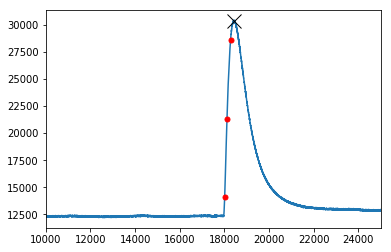

q


In [9]:
for i in range(nentries) :
    x = func.pyroot_read(tr, i, 15000, 17000, 100e+3)
    xx = x[0][1]
    xx = np.array(xx)
    y = func.heat_ana(x[0][1], 10./2**18, 100e+3, x[4][1], x[6][1], 17000)
    plt.plot(xx)
    plt.plot(y[0], y[1]+y[-1], 'kx', markersize=14)
    plt.plot(y[2], y[5], 'ro', markersize=5)
    plt.plot(y[3], y[6], 'ro', markersize=5)
    plt.plot(y[4], y[7], 'ro', markersize=5)
    plt.xlim(10000,25000)
    plt.show()
    
    a = input()
    if (a=='q') : break

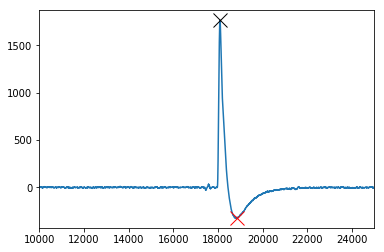

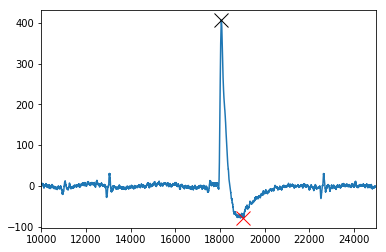

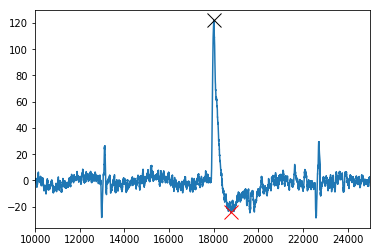

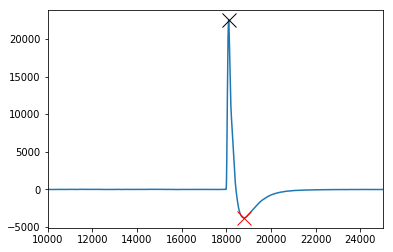

q


In [6]:
for i in range(nentries) :
    x = func.pyroot_read(tr, i, 15000, 17000, 100e+3)
    xx = x[0][1]
    xx = np.array(xx)
    y = func.heat_filter_ana(400, 800, 1, xx-xx[0], 10./2**18, 100e+3, 17000)
    xxx = butter_bandpass_filter_sos(xx-xx[0], 400, 800, 100e+3, order=1)
    plt.plot(xxx)
    plt.plot(y[0], y[1]-y[2], 'kx', markersize=14)
    plt.plot(y[-2], y[-1], 'rx', markersize=14)
    plt.xlim(10000,25000)
    plt.show()
    
    a = input()
    if (a=='q') : break